<Figure size 1400x800 with 0 Axes>

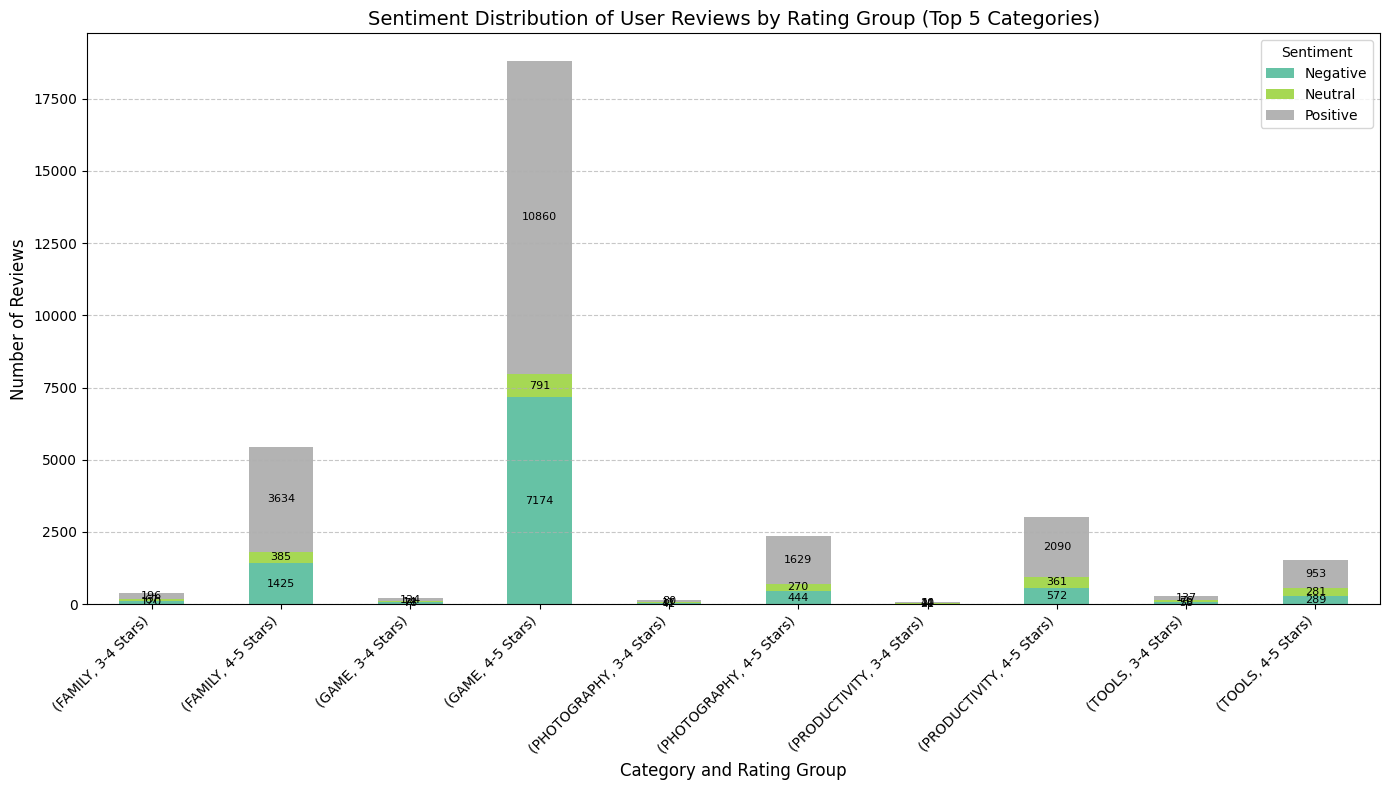

In [1]:
# 📦 Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📝 Step 2: Load datasets
playstore_df = pd.read_csv(r"D:\vanshikaPython null\Play Store Data.csv")
reviews_df = pd.read_csv(r"D:\vanshikaPython null\User Reviews.csv")

# 🔍 Step 3: Filter apps with more than 1,000 reviews
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'], errors='coerce')
filtered_apps = playstore_df[playstore_df['Reviews'] > 1000]

# 🔝 Step 4: Get top 5 categories by number of apps
top5_categories = filtered_apps['Category'].value_counts().nlargest(5).index
filtered_apps = filtered_apps[filtered_apps['Category'].isin(top5_categories)]

# 🔗 Step 5: Merge user reviews with filtered apps (on App name)
merged_df = pd.merge(reviews_df, filtered_apps[['App', 'Category', 'Rating']], on='App', how='inner')

# 🧹 Step 6: Clean and convert ratings
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')

# 🎯 Step 7: Define rating groups
def rating_group(rating):
    if 1 <= rating <= 2:
        return '1-2 Stars'
    elif 2 < rating <= 4:
        return '3-4 Stars'
    elif 4 < rating <= 5:
        return '4-5 Stars'
    else:
        return None

merged_df['Rating Group'] = merged_df['Rating'].apply(rating_group)
merged_df = merged_df.dropna(subset=['Rating Group', 'Sentiment'])

# 📊 Step 8: Group by category, rating group, and sentiment
sentiment_counts = merged_df.groupby(['Category', 'Rating Group', 'Sentiment']).size().reset_index(name='Count')

# 🪄 Step 9: Pivot for stacked bar chart
pivot_df = sentiment_counts.pivot_table(index=['Category', 'Rating Group'], columns='Sentiment', values='Count', fill_value=0)

# 🖼️ Step 10: Plot the stacked bar chart
plt.figure(figsize=(14, 8))
ax = pivot_df.plot(kind='bar', stacked=True, colormap='Set2', figsize=(14, 8))

plt.title('Sentiment Distribution of User Reviews by Rating Group (Top 5 Categories)', fontsize=14)
plt.xlabel('Category and Rating Group', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Add value labels to bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)

plt.show()


In [2]:
# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pytz import timezone

# 🕐 Step 2: Check Time (Only run between 1 PM and 2 PM IST)
india = timezone('Asia/Kolkata')
now = datetime.now(india)
if not (13 <= now.hour < 14):
    print("⏳ This graph is only available between 1 PM and 2 PM IST.")
else:
    # 📂 Step 3: Load Dataset
    playstore_df = pd.read_csv(r"D:\vanshikaPython null\Play Store Data.csv")

    # 🔍 Step 4: Data Cleaning
    playstore_df = playstore_df.dropna(subset=['Installs', 'Price', 'Size', 'Android Ver', 'Content Rating'])
    playstore_df = playstore_df[playstore_df['Content Rating'] == 'Everyone']

    # Filter by Android Version > 4.0
    playstore_df['Android Ver'] = playstore_df['Android Ver'].str.extract('(\d+\.?\d*)')
    playstore_df['Android Ver'] = pd.to_numeric(playstore_df['Android Ver'], errors='coerce')
    playstore_df = playstore_df[playstore_df['Android Ver'] > 4.0]

    # Clean Size (remove "M", drop "k" and "Varies with device")
    playstore_df = playstore_df[~playstore_df['Size'].str.contains('k|Varies with device', na=False)]
    playstore_df['Size'] = playstore_df['Size'].str.replace('M', '', regex=False)
    playstore_df['Size'] = pd.to_numeric(playstore_df['Size'], errors='coerce')
    playstore_df = playstore_df[playstore_df['Size'] > 15]

    # Clean Installs
    playstore_df['Installs'] = playstore_df['Installs'].str.replace('[+,]', '', regex=True)
    playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'], errors='coerce')
    playstore_df = playstore_df[playstore_df['Installs'] > 10000]

    # Clean Price and Compute Revenue
    playstore_df['Price'] = playstore_df['Price'].str.replace('$', '', regex=False).str.strip()
    playstore_df['Price'] = pd.to_numeric(playstore_df['Price'], errors='coerce')
    playstore_df['Revenue'] = playstore_df['Installs'] * playstore_df['Price']
    playstore_df = playstore_df[playstore_df['Revenue'] > 10000]

    # Filter App Names with <= 30 characters (including spaces and special characters)
    playstore_df = playstore_df[playstore_df['App'].str.len() <= 30]

    # 🏆 Get Top 3 Categories
    top3_categories = playstore_df['Category'].value_counts().nlargest(3).index
    filtered_df = playstore_df[playstore_df['Category'].isin(top3_categories)]

    # 🧾 Group by Type (Free/Paid)
    comparison = filtered_df.groupby(['Category', 'Type']).agg({
        'Installs': 'mean',
        'Revenue': 'mean'
    }).reset_index()

    # 📊 Dual Axis Plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Bar plot for Installs
    sns.barplot(data=comparison, x='Category', y='Installs', hue='Type', ax=ax1, palette='Blues')
    ax1.set_ylabel('Average Installs', color='blue')

    # Line plot for Revenue
    ax2 = ax1.twinx()
    sns.lineplot(data=comparison, x='Category', y='Revenue', hue='Type', ax=ax2, marker='o', linestyle='--', palette='Dark2')
    ax2.set_ylabel('Average Revenue (USD)', color='green')

    plt.title('Comparison of Average Installs and Revenue for Free vs. Paid Apps\n(Top 3 Categories)')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='green')
    fig.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

⏳ This graph is only available between 1 PM and 2 PM IST.


In [3]:
import warnings
import pandas as pd
import plotly.express as px
from datetime import datetime
import pytz

# 1) Load the data
df = pd.read_csv(r"D:\vanshikaPython null\Play Store Data.csv")
# 2) Clean & parse:
# a) Installs → strip "+", "," → coerce non‑numbers → drop NaN
df['Installs'] = pd.to_numeric(
    df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True),
    errors='coerce'
)
df.dropna(subset=['Installs'], inplace=True)

# b) Size → MB as float
def parse_size(x):
    if isinstance(x, str):
        x = x.strip().upper()
        if x.endswith('M'):
            try: return float(x[:-1])
            except: return None
        if x.endswith('K'):
            try: return float(x[:-1]) / 1024
            except: return None
    return None

df['Size_MB'] = df['Size'].apply(parse_size)

# c) Last Updated → datetime (suppress fallback warning)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Could not infer format", category=UserWarning)
    df['Last_Updated'] = pd.to_datetime(
        df['Last Updated'],
        errors='coerce',
        infer_datetime_format=True
    )

# d) Reviews & Rating → numeric coercion
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Rating']  = pd.to_numeric(df['Rating'],  errors='coerce')

# 3) Filter apps by:
#    • Size ≥10 MB
#    • Last Updated in January
df_jan = df[
    (df['Size_MB'] >= 10) &
    (df['Last_Updated'].dt.month == 1)
].copy()

# 4) Group by Category → compute metrics
grouped = (
    df_jan
      .groupby('Category')
      .agg(
          total_installs = ('Installs','sum'),
          avg_rating     = ('Rating','mean'),
          total_reviews  = ('Reviews','sum')
      )
      .reset_index()
)

# 5) Filter out categories with avg_rating < 4.0
grouped = grouped[grouped['avg_rating'] >= 4.0]

# 6) Take top 10 by total_installs
top10 = grouped.nlargest(10, 'total_installs').reset_index(drop=True)

# —— DEBUG PRINT #1 —— 
print("\n📋 Top 10 categories & their metrics:")
print(top10.to_string(index=False))

# 7) IST time‑gate: only show between 3 PM and 5 PM IST
ist = pytz.timezone('Asia/Kolkata')
now_hour = datetime.now(ist).hour

if 15 <= now_hour < 17:
    # 8) Plot grouped bar chart
    fig = px.bar(
        top10,
        x='Category',
        y=['avg_rating','total_reviews'],
        barmode='group',
        labels={
            'value': 'Metric Value',
            'variable': 'Metric',
            'Category': 'App Category'
        },
        title="📊 Avg Rating vs Total Reviews (Top 10 Categories)"
    )
    fig.update_layout(
        xaxis_tickangle=-45,
        legend_title_text="Metric"
    )

    # —— DEBUG PRINT #2 —— 
    for trace in fig.data:
        print(f"\n🔍 Trace: {trace.name}")
        for cat, val in zip(trace.x, trace.y):
            print(f"  • {cat}: {val}")

    # finally display
    fig.show()
else:
    print("⏳ Chart is only available between 3 PM and 5 PM IST.")
    print("🕒 Current IST time:", datetime.now(ist).strftime("%I:%M %p"))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14180\2884512805.py:34: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Last_Updated'] = pd.to_datetime(



📋 Top 10 categories & their metrics:
       Category  total_installs  avg_rating  total_reviews
         FAMILY     199721180.0    4.185714        4737822
         SPORTS     120511100.0    4.342857        1982017
           GAME     117291000.0    4.251515        2412245
  ENTERTAINMENT      51000000.0    4.250000        1238948
PERSONALIZATION      15061000.0    4.475000         156004
      LIFESTYLE       6171560.0    4.050000          53376
      EDUCATION       2000000.0    4.400000          57645
       SHOPPING       2000000.0    4.200000          19950
  COMMUNICATION       1011000.0    4.050000          15398
 ART_AND_DESIGN        620000.0    4.100000           2167
⏳ Chart is only available between 3 PM and 5 PM IST.
🕒 Current IST time: 02:33 PM


In [4]:
import pandas as pd
import plotly.express as px
from datetime import datetime
import pytz

# Load the data
df = pd.read_csv(r"D:\vanshikaPython null\Play Store Data.csv")

# Step 1: Clean 'Installs' column
df['Installs'] = df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
df = df[df['Installs'].str.isnumeric()]  # Remove non-numeric
df['Installs'] = df['Installs'].astype(float)  # Convert to float

# Step 2: Filter installs > 1 million and exclude categories starting with A, C, G, or S
filtered_df = df[
    (df['Installs'] > 1_000_000) &
    (~df['Category'].str.startswith(tuple("ACGS")))
]

# Step 3: Get top 5 categories by total installs
category_installs = filtered_df.groupby('Category')['Installs'].sum().reset_index()
top_5 = category_installs.sort_values(by='Installs', ascending=False).head(5).reset_index(drop=True)

# Step 4: Assign dummy countries and ISO codes
dummy_data = {
    'India': 'IND',
    'United States': 'USA',
    'Brazil': 'BRA',
    'Germany': 'DEU',
    'Canada': 'CAN'
}
top_5['Country'] = list(dummy_data.keys())[:len(top_5)]
top_5['iso_alpha'] = top_5['Country'].map(dummy_data)

# Step 5: Time restriction - only show chart between 6 PM and 8 PM IST
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
hour = current_time.hour

if 18 <= hour < 20:
    fig = px.choropleth(
        top_5,
        locations='iso_alpha',
        color='Installs',
        hover_name='Country',  # ✅ Show country in hover
        hover_data={'Category': True, 'Installs': ':.3s', 'iso_alpha': False},  # 👈 Clean hover
        color_continuous_scale='Plasma',
        title='🌍 Top 5 App Categories with >1M Installs (Excluding A, C, G, S)'
    )
    
    # ✅ Update layout with custom legend and no borders
    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=True),
        coloraxis_colorbar=dict(
            title="Total Installs<br>for Top Category",  # ✅ Clear colorbar title
            ticksuffix=' installs',
        )
    )
    fig.show()
else:
    print("⏳ Choropleth map is available only between 6 PM and 8 PM IST.")
    print("🕓 Current IST time:", current_time.strftime("%I:%M %p"))


⏳ Choropleth map is available only between 6 PM and 8 PM IST.
🕓 Current IST time: 02:33 PM


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

# Load the data
df = pd.read_csv(r"D:\vanshikaPython null\Play Store Data.csv")
print(f"✅ Loaded data with shape: {df.shape}")

# Convert Reviews to numeric (some entries might be non-numeric like '3.0M')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Drop NaN values for required columns
df.dropna(subset=['App', 'Category', 'Rating', 'Reviews'], inplace=True)

# Apply filtering conditions
filtered_df = df[
    (df['Rating'] < 4.0) &
    (df['Reviews'] > 10) &
    (df['App'].str.contains('C', case=False, na=False))
]

# Filter categories with more than 50 apps after filtering
category_counts = filtered_df['Category'].value_counts()
valid_categories = category_counts[category_counts > 50].index
filtered_df = filtered_df[filtered_df['Category'].isin(valid_categories)]

print(f"🎯 Filtered data shape: {filtered_df.shape}")

# Check current time in IST
now_ist = datetime.now(pytz.timezone('Asia/Kolkata'))
print("🕓 Current IST time:", now_ist.strftime("%I:%M %p"))

# Time condition: show plot only between 4 PM to 6 PM IST
if 16 <= now_ist.hour < 18:
    plt.figure(figsize=(14, 6))
    sns.violinplot(x='Category', y='Rating', data=filtered_df, palette='Set2')
    plt.title("🎻 Violin Plot: Distribution of Ratings (Rating < 4.0, Apps w/ 'C', >50/category, >10 reviews)")
    plt.xlabel("App Category")
    plt.ylabel("App Rating")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("🚫 Not within allowed time window (4 PM to 6 PM IST). Skipping plot.")

    # 👇 For debugging or checking output:
print(filtered_df[['App', 'Category', 'Rating', 'Reviews']].head(10))
print("Total Categories:", filtered_df['Category'].nunique())
print(filtered_df['Category'].value_counts())

✅ Loaded data with shape: (10841, 13)
🎯 Filtered data shape: (459, 13)
🕓 Current IST time: 02:33 PM
🚫 Not within allowed time window (4 PM to 6 PM IST). Skipping plot.
                                         App   Category  Rating   Reviews
1580                               HTC Speak  LIFESTYLE     3.5    6145.0
1589                        Caf - My Account  LIFESTYLE     3.9   18961.0
1591     Family convenience store FamilyMart  LIFESTYLE     3.3    9663.0
1594  Official Matsumoto Kiyoshi application  LIFESTYLE     3.2    3031.0
1596      PASS by KT (formerly KT certified)  LIFESTYLE     3.5    7869.0
1600          OK cashbag [point of pleasure]  LIFESTYLE     3.7   33264.0
1607                Wedding Countdown Widget  LIFESTYLE     3.9    7376.0
1618                               Brit + Co  LIFESTYLE     3.9     987.0
1682                   Race the Traffic Moto       GAME     3.8  270687.0
1782                          Will it Crush?       GAME     3.1   25825.0
Total Categories: 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

def is_in_ist_window(start_h=18, end_h=21):
    """Return True if current IST time is between start_h and end_h (inclusive)."""
    now_ist = datetime.now(pytz.timezone('Asia/Kolkata')).time()
    return now_ist >= datetime.strptime(f"{start_h}:00", "%H:%M").time() \
       and now_ist <= datetime.strptime(f"{end_h}:00", "%H:%M").time()

# ── Load & clean ───────────────────────────────────────────────────────────────
df = pd.read_csv(r"D:\vanshikaPython null\Play Store Data.csv")
# Strip non‑digits from Installs, then coerce to numeric
df['Installs'] = (
    df['Installs']
      .astype(str)
      .str.replace('[^0-9]', '', regex=True)
      .pipe(pd.to_numeric, errors='coerce')
)

# Parse 'Last Updated' using the detected format
df['Last Updated'] = pd.to_datetime(
    df['Last Updated'],
    format="%d-%b-%y",   # e.g. "07-Jan-18"
    errors='coerce'
)

# Drop rows missing critical fields
df = df.dropna(subset=['Installs', 'Last Updated', 'App', 'Category', 'Reviews'])
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

print(f"Total rows after cleaning: {len(df):,}")

# ── Filter ────────────────────────────────────────────────────────────────────
mask = (
    ~df['App'].str.lower().str.startswith(('x','y','z')) &
     df['Category'].str.upper().str.startswith(('B','C','E')) &
     (df['Reviews'] > 500)
)
filtered = df.loc[mask].copy()  # copy() avoids SettingWithCopyWarning

print(f"Rows after filtering: {len(filtered):,}")

if filtered.empty:
    print("No data available after filtering.")
    raise SystemExit

# ── Group & compute MoM ──────────────────────────────────────────────────────
filtered.loc[:, 'Month'] = filtered['Last Updated'].dt.to_period('M')
grp = (
    filtered
     .groupby(['Month', 'Category'])['Installs']
     .sum()
     .reset_index()
)
grp['Month'] = grp['Month'].dt.to_timestamp()
grp = grp.sort_values(['Category','Month'])
grp['Prev_Installs'] = grp.groupby('Category')['Installs'].shift(1)
grp['MoM_Change']   = (grp['Installs'] - grp['Prev_Installs']) / grp['Prev_Installs']
grp['High_Growth']  = grp['MoM_Change'] > 0.20

# ── Plot ─────────────────────────────────────────────────────────────────────
if is_in_ist_window():
    plt.figure(figsize=(14,8))
    for cat, df_cat in grp.groupby('Category'):
        plt.plot(df_cat['Month'], df_cat['Installs'], label=cat)
        plt.fill_between(
            df_cat['Month'], df_cat['Installs'],
            where=df_cat['High_Growth'],
            alpha=0.3, color='orange'
        )
    plt.title("Monthly Installs Trend by Category (B, C, E only)\n(Shaded = >20% MoM Growth)")
    plt.xlabel("Month")
    plt.ylabel("Total Installs")
    plt.legend(title="App Category", bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Visualization available only between 18 PM and 9 PM IST.")

Total rows after cleaning: 10,840
Rows after filtering: 852
Visualization available only between 18 PM and 9 PM IST.


Original dataset: (10841, 13)
After valid 'Last Updated': (10840, 13)
After cleaning installs/reviews: (10840, 13)
After filter: installs ≥ 100k: (6119, 13)
After filter: reviews > 1k: (5698, 13)
After genre exclusion filter: (4223, 13)
Final dataset for heatmap: (4219, 3)


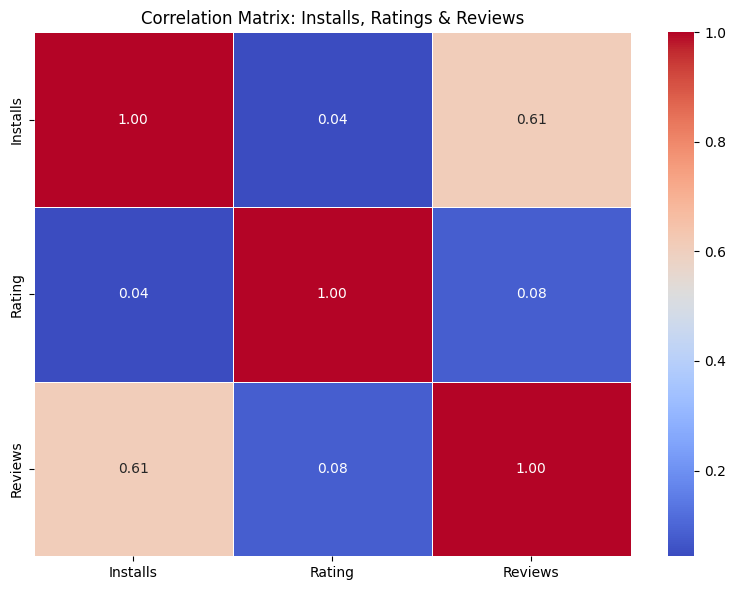

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

# ── Function to check time window ─────────────────────────────────────────────
def is_in_ist_window(start_h=14, end_h=16):
    """Returns True if current IST time is between 2 PM and 4 PM."""
    now_ist = datetime.now(pytz.timezone('Asia/Kolkata')).time()
    return datetime.strptime(f"{start_h}:00", "%H:%M").time() <= now_ist <= datetime.strptime(f"{end_h}:00", "%H:%M").time()

# ── Load data ─────────────────────────────────────────────────────────────────
df = pd.read_csv(r"D:\vanshikaPython null\Play Store Data.csv")
print("Original dataset:", df.shape)

# Convert 'Last Updated' column
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format="%d-%b-%y", errors='coerce')
df = df.dropna(subset=['Last Updated'])
print("After valid 'Last Updated':", df.shape)

# 🔁 Removed date filter due to lack of recent updates

# Clean 'Installs' and convert
df['Installs'] = df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Drop missing installs/reviews
df = df.dropna(subset=['Installs', 'Reviews'])
print("After cleaning installs/reviews:", df.shape)

# Filter: Installs ≥ 100,000
df = df[df['Installs'] >= 100000]
print("After filter: installs ≥ 100k:", df.shape)

# Filter: Reviews > 1,000
df = df[df['Reviews'] > 1000]
print("After filter: reviews > 1k:", df.shape)

# Filter: Genres not starting with A, F, E, G, I, K
if 'Genres' in df.columns:
    df['Genres'] = df['Genres'].astype(str)
    genre_filter = ~df['Genres'].str.upper().str.startswith(tuple("AFEGIK"))
    df = df[genre_filter]
    print("After genre exclusion filter:", df.shape)
else:
    print(" 'Genres' column not found!")

# Ensure 'Rating' column is usable
if 'Rating' not in df.columns:
    print(" 'Rating' column is missing.")
    raise SystemExit

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Final data for correlation
correlation_data = df[['Installs', 'Rating', 'Reviews']].dropna()
print("Final dataset for heatmap:", correlation_data.shape)

# ── Plot heatmap ──────────────────────────────────────────────────────────────
if is_in_ist_window():
    if not correlation_data.empty:
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Correlation Matrix: Installs, Ratings & Reviews")
        plt.tight_layout()
        plt.show()
    else:
        print(" No data available after filtering.")
else:
    print("This visualization is only available between 2 PM and 4 PM IST.")
